In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data=pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [5]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [8]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\pratiksha gosavi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 91752.2656 - mae: 273.9270 - val_loss: 83544.8984 - val_mae: 258.7185
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89946.6953 - mae: 270.1102 - val_loss: 82847.0469 - val_mae: 257.3699
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89397.2344 - mae: 270.1747 - val_loss: 81779.4219 - val_mae: 255.2901
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88175.9375 - mae: 265.6621 - val_loss: 80111.8750 - val_mae: 252.0056
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87081.5781 - mae: 265.3096 - val_loss: 77674.5312 - val_mae: 247.1239
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87505.8594 - mae: 266.7231 - val_loss: 74292.0312 - val_mae: 240.1828
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79746.5547 - mae: 249.5381 - val_loss: 69871.4062 - val_mae: 230.7738
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72800.2109 - mae: 238.5403 - val_loss: 64369.0

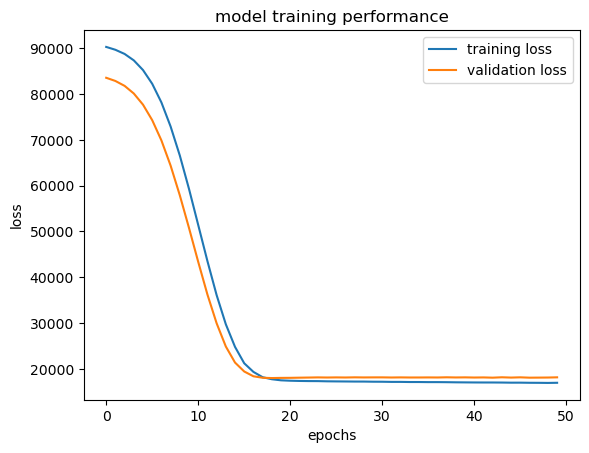

In [16]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model training performance')
plt.legend()
plt.show()

In [17]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"test mean absolute error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18024.4414 - mae: 115.3726  
test mean absolute error: 115.59


In [18]:
predictions=model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[283.43063],
       [253.38602],
       [262.21912],
       [210.35788],
       [346.27835],
       [307.68616],
       [328.5419 ],
       [294.0209 ],
       [294.11798],
       [271.5869 ],
       [240.07791],
       [266.27103],
       [283.0986 ],
       [233.45888],
       [289.41733],
       [313.37296],
       [261.22556],
       [315.63345],
       [294.27026],
       [246.90277],
       [273.74527],
       [296.50836],
       [275.90952],
       [280.67102],
       [251.82706],
       [240.41553],
       [262.82367],
       [327.6678 ],
       [311.35648],
       [264.15015],
       [235.16058],
       [305.79138],
       [295.26804],
       [261.01468],
       [316.20712],
       [295.79742],
       [217.00562],
       [253.31943],
       [283.32834],
       [250.62387],
       [248.9664 ],
       [254.19357],
       [247.8234 ],
       [254.93954],
       [274.41238],
       [249.31686],
       [274.7868 ],
       [253.58134],
       [297.39694],
       [305.3921 ],


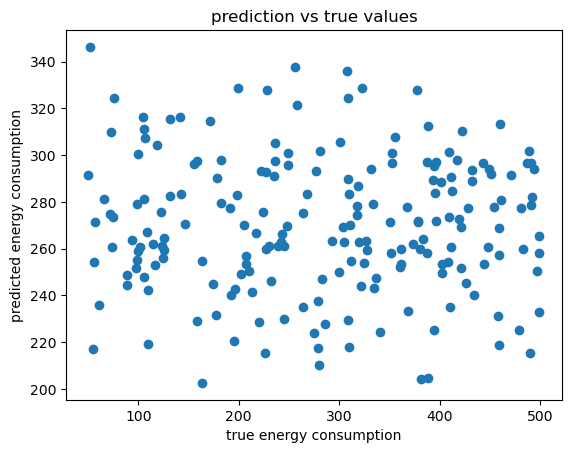

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('true energy consumption')
plt.ylabel('predicted energy consumption')
plt.title('prediction vs true values')
plt.show()